In [1]:
from deep_rl import *
import matplotlib.pyplot as plt

/network/home/penmetss/DeepRL/deeprl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/network/home/penmetss/DeepRL/deeprl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/network/home/penmetss/DeepRL/deeprl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/network/home/penmetss/DeepRL/deeprl/lib

In [2]:
def dsr_feature(**kwargs):
    generate_tag(kwargs)
    kwargs.setdefault('log_level', 0)
    config = Config()
    config.merge(kwargs)

    config.task_fn = lambda: Task(config.game)
    config.eval_env = config.task_fn()
    config.c = 0.1

    config.optimizer_fn = lambda params: torch.optim.RMSprop(params, 0.001)
    config.network_fn = lambda: SRNet(config.action_dim, SRIdentityBody(config.state_dim))
    # config.network_fn = lambda: DuelingNet(config.action_dim, FCBody(config.state_dim))
    # config.replay_fn = lambda: Replay(memory_size=int(1e4), batch_size=10)
    config.replay_fn = lambda: AsyncReplay(memory_size=int(1e4), batch_size=10)

    config.random_action_prob = LinearSchedule(1.0, 0.1, 1e4)
    config.discount = 0.99
    config.target_network_update_freq = 200
    config.exploration_steps = 1000
    # config.double_q = True
    config.double_q = False
    config.sgd_update_frequency = 4
    config.gradient_clip = 5
    config.eval_interval = int(5e3)
    config.max_steps = 1e5
    config.async_actor = False
    run_steps(DSRAgent(config))
    
# DQN
def dqn_feature(**kwargs):
    generate_tag(kwargs)
    kwargs.setdefault('log_level', 0)
    config = Config()
    config.merge(kwargs)

    config.task_fn = lambda: Task(config.game)
    config.eval_env = config.task_fn()

    config.optimizer_fn = lambda params: torch.optim.RMSprop(params, 0.001)
    config.network_fn = lambda: VanillaNet(config.action_dim, FCBody(config.state_dim))
    # config.network_fn = lambda: DuelingNet(config.action_dim, FCBody(config.state_dim))
    # config.replay_fn = lambda: Replay(memory_size=int(1e4), batch_size=10)
    config.replay_fn = lambda: AsyncReplay(memory_size=int(1e4), batch_size=10)

    config.random_action_prob = LinearSchedule(1.0, 0.1, 1e4)
    config.discount = 0.99
    config.target_network_update_freq = 200
    config.exploration_steps = 1000
    # config.double_q = True
    config.double_q = False
    config.sgd_update_frequency = 4
    config.gradient_clip = 5
    config.eval_interval = int(5e3)
    config.max_steps = 1e5
    config.async_actor = False
    run_steps(DQNAgent(config))

In [3]:
mkdir('log')
mkdir('tf_log')
set_one_thread()
random_seed()
select_device(-1)

In [7]:
# game = 'CartPole-v0'
game = 'FourRooms'
dsr_feature(game=game)


2020-02-28 05:18:21,973 - root - INFO: steps 0, 119837257.14 steps/s


> /network/home/penmetss/DeepRL/deep_rl/agent/BaseAgent.py(43)eval_episode()
-> action = self.eval_step(state)
(Pdb) s
--Call--
> /network/home/penmetss/DeepRL/deep_rl/agent/DSR_agent.py(69)eval_step()
-> def eval_step(self, state):
(Pdb) n
> /network/home/penmetss/DeepRL/deep_rl/agent/DSR_agent.py(70)eval_step()
-> self.config.state_normalizer.set_read_only()
(Pdb) n
> /network/home/penmetss/DeepRL/deep_rl/agent/DSR_agent.py(71)eval_step()
-> state = self.config.state_normalizer(state)
(Pdb) n
> /network/home/penmetss/DeepRL/deep_rl/agent/DSR_agent.py(72)eval_step()
-> import pdb; pdb.set_trace()
(Pdb) n
> /network/home/penmetss/DeepRL/deep_rl/agent/DSR_agent.py(73)eval_step()
-> _, q = self.network(state)
(Pdb) self.network(state)
*** AttributeError: 'numpy.ndarray' object has no attribute 'dim'
(Pdb) n
AttributeError: 'numpy.ndarray' object has no attribute 'dim'
> /network/home/penmetss/DeepRL/deep_rl/agent/DSR_agent.py(73)eval_step()
-> _, q = self.network(state)
(Pdb) n
--Return-

AttributeError: 'numpy.ndarray' object has no attribute 'dim'

In [6]:
# game = 'CartPole-v0'
game = 'FourRooms'
dqn_feature(game=game)

2020-02-28 05:17:42,498 - root - INFO: steps 0, 174762666.67 steps/s


> /network/home/penmetss/DeepRL/deep_rl/agent/BaseAgent.py(43)eval_episode()
-> action = self.eval_step(state)
(Pdb) s
--Call--
> /network/home/penmetss/DeepRL/deep_rl/agent/DQN_agent.py(63)eval_step()
-> def eval_step(self, state):
(Pdb) state
[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])]
(Pdb) n
> /network/home/penmetss/DeepRL/deep_rl/agent/DQN_agent.py(64)eval_step()
-> self.config.state_normalizer.set_read_only()
(Pdb) state
[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

BdbQuit: 

In [6]:
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
# plt.rc('text', usetex=True)
from deep_rl import *

In [13]:
%cat log/CartPole-v0--run-0-200227-205236.txt

2020-02-27 20:52:37,674 - root - INFO: steps 0, 104857600.00 steps/s
2020-02-27 20:52:37,698 - root - INFO: steps 0, episodic_return_test 9.80(0.13)
2020-02-27 20:52:37,821 - root - INFO: steps 11, episodic_return_train 12.0
2020-02-27 20:52:37,837 - root - INFO: steps 61, episodic_return_train 50.0
2020-02-27 20:52:37,842 - root - INFO: steps 75, episodic_return_train 14.0
2020-02-27 20:52:37,849 - root - INFO: steps 94, episodic_return_train 19.0
2020-02-27 20:52:37,855 - root - INFO: steps 111, episodic_return_train 17.0
2020-02-27 20:52:37,867 - root - INFO: steps 151, episodic_return_train 40.0
2020-02-27 20:52:37,875 - root - INFO: steps 173, episodic_return_train 22.0
2020-02-27 20:52:37,886 - root - INFO: steps 209, episodic_return_train 36.0
2020-02-27 20:52:37,893 - root - INFO: steps 230, episodic_return_train 21.0
2020-02-27 20:52:37,898 - root - INFO: steps 241, episodic_return_train 11.0
2020-02-27 20:52:37,905 - root - INFO: steps 261, episodic_return_train 20.0
2020-02-

In [5]:
import re
%ls log/

CartPole-v0--run-0-200227-205236.txt  FourRooms--run-0-200228-010531.txt
CartPole-v0--run-0-200228-004756.txt  FourRooms--run-0-200228-011410.txt
FourRooms--run-0-200228-000646.txt    FourRooms--run-0-200228-012330.txt
FourRooms--run-0-200228-005249.txt    FourRooms--run-0-200228-012412.txt
FourRooms--run-0-200228-005912.txt    FourRooms--run-0-200228-043814.txt
FourRooms--run-0-200228-010316.txt


In [9]:
filename = 'log/FourRooms--run-0-200228-043814.txt'

In [10]:
returns_train = []
returns_test = []
with open(filename, 'rb') as f:
    while True:
        line = f.readline()
        split = re.split('\s', str(line))
        if not line:
            break
        if('episodic_return_train' in split):
            returns_train.append(float(split[-1][:-3]))
        if('episodic_return_test' in split):
#             import pdb;pdb.set_trace()
            returns_test.append(float(split[-1][:-10]))

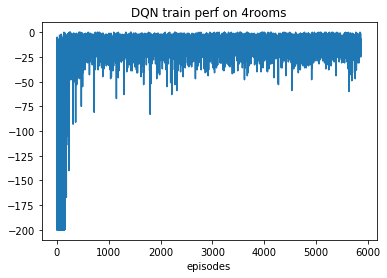

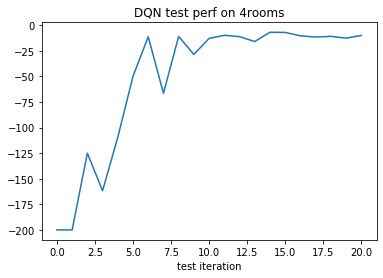

In [11]:
import matplotlib.pyplot as plt

plt.plot(returns_train)
plt.title('DQN train perf on 4rooms')
plt.xlabel('episodes')
plt.show()

plt.plot(returns_test)
plt.title('DQN test perf on 4rooms')
plt.xlabel('test iteration')
plt.show()

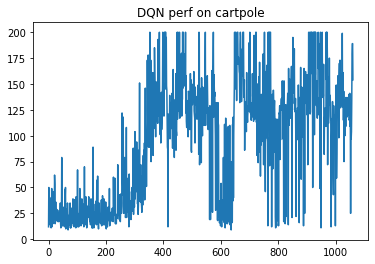

In [13]:
import matplotlib.pyplot as plt
plt.plot(returns)
plt.title('DQN perf on cartpole')
plt.show()

In [5]:
from gym import spaces

In [8]:
len(np.array([1,2,3]))

3